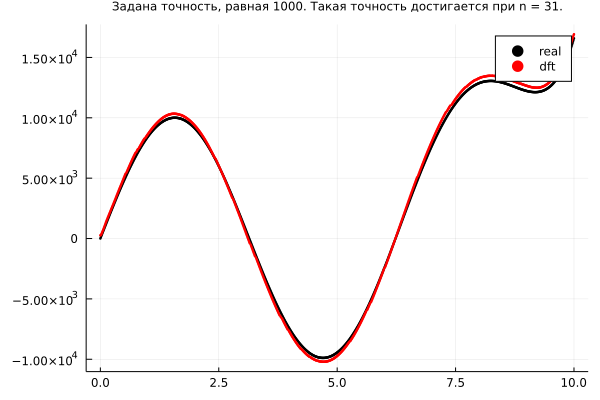

  0.164134 seconds (40 allocations: 324.250 KiB)


In [85]:
using Plots

function dft(x) 
    N = length(x)
    Y = zeros(ComplexF64, N)
    
    for k = 1:N
        sum = 0
        for n = 1:N
            sum = sum + x[n] * (cos(2*pi*(k-1)*(n-1)/N) - im * sin(2*pi*(k-1)*(n-1)/N))
        end
        Y[k] = sum
    end
    
    return Y
end

function dft_inv(x)
    N = length(x)
    y = zeros(Float64, N)
    
    for n = 1:N
        sum = 0
        for k = 1:N
            sum = sum + real(x[k] * (cos(2*pi*(k-1)*(n-1)/N) + im * sin(2*pi*(k-1)*(n-1)/N)))
        end
        y[n] = sum/N
    end
    
    return y
end

function reduce_array(x, y, n) # n must be < N  
    while n > 0
        index = rand(1:length(x))
        x = deleteat!(x, index)
        y = deleteat!(y, index)
        n -= 1
    end
    
    return x, y
end

function calc_number(f, N, left_bound, right_bound, n, nerror) 
    x = Vector(LinRange(left_bound, right_bound, N))                   
    Y = dft(f.(x))                                   
    reducedx, reducedY = reduce_array(x, Y, n)        
    y = dft_inv(reducedY)                            
    error = maximum(abs.(y - f(reducedx)))
    
    @time while ((error > nerror)&(n != 0))|(error == -1)
        n = Integer(round(n/2, digits = 0))
        
        x = Vector(LinRange(left_bound, right_bound, N))  #Почему так? потому что deleteat! перезаписывает массив, а 
        Y = dft(f.(x))                                    #другого метода, видимо, не существует.
        reducedx, reducedY = reduce_array(x, Y, n)        #Поэтому пока-что так. Если необходимо - просто нужно 
        y = dft_inv(reducedY)                             #подправить ручками reduce_array
        error = maximum(abs.(y - f(reducedx)))
    end
    
    return reducedx, y, n, error
end

function f(x) 
    return exp.(x) + 10000*sin.(x)
end

N = 1000
bound = [0, 10]
err = 1000

xplot = Vector(LinRange(bound[1], bound[2], N))
titleline = "Задана точность, равная "*string(err)
reduce_number = Integer(round(length(xplot)/2, digits = 0))
reducedx, y, n, error = calc_number(f, N, bound[1], bound[2], reduce_number, err)

if (n == 0)
    titleline *= ". Такая точность не достигается."
else
    titleline *= ". Такая точность достигается при n = "*string(n)*"."
end

scatter(xplot, f.(xplot), label = "real", ms = 1.5, markerstrokewidth = 0, color = "black", title = titleline,
                                                                                            titlefontsize = 8)
display(scatter!(reducedx, y, label = "dft", ms = 1.5, markerstrokewidth = 0, color = "red"))

#varinfo()